# ICML Chap 1

In [1]:
X = [0, 1, 2, 3, 4]
Y = [0, 1, 2, 3, 4]

In [2]:
import matplotlib.pyplot as plt

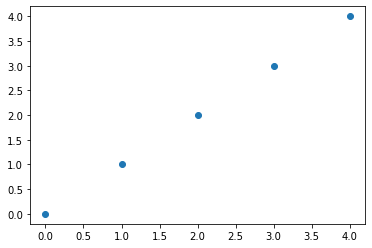

In [3]:
plt.scatter(X,Y)
plt.show()

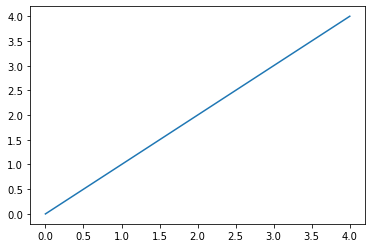

In [4]:
plt.plot(X, Y)

In [5]:
import numpy as np
seed = 123
np.random.seed(seed)

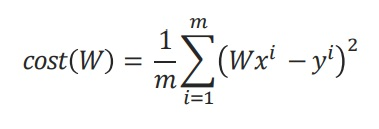

In [6]:
class Hypo():
    def __init__(self,w,b):
        self.w=w
        self.b=b
        
    def hypothesis(self,x):
        if self.b==False:
            return self.w*x
        else :
            return self.w*x+b
    
def cost(h,X,Y):
    err=0
    for i in range(len(X)):
        err+=(h.hypothesis(X[i])-Y[i])**2
    err=err/len(X)
    return err
def cost1(h,X,Y):
    err=0
    for i in range(len(X)):
        err+=abs(h.hypothesis(X[i])-Y[i])
    err=err/len(X)
    return err

# bais가 없을 때

In [7]:
weight1=[]
cost_num1=[]
for i in range(-200,200):
    w=i*0.01
    b=False
    h1=Hypo(w,b)
    c=cost(h1,X,Y)
    weight1.append(w)
    cost_num1.append(c)

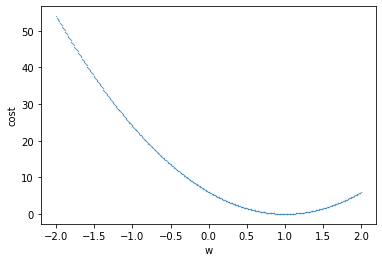

In [8]:
plt.xlabel("w")
plt.ylabel("cost")
plt.scatter(weight1,cost_num1, s=0.1)

# bais가 있을 때

In [9]:
weight_b=[]
cost_num_b=[]
for i in range(-200,200):
    w=i*0.1
    b=2
    h1=Hypo(w,b)
    c=cost(h1,X,Y)
    weight_b.append(w)
    cost_num_b.append(c)

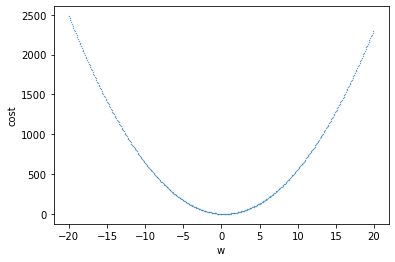

In [10]:
plt.xlabel("w")
plt.ylabel("cost")
plt.scatter(weight_b,cost_num_b, s=0.1)

# 절댓 값

In [11]:
weight_abs=[]
cost_num_abs=[]
for i in range(-200,200):
    w=i*0.1
    b=2
    h1=Hypo(w,b)
    c=cost1(h1,X,Y)
    weight_abs.append(w)
    cost_num_abs.append(c)

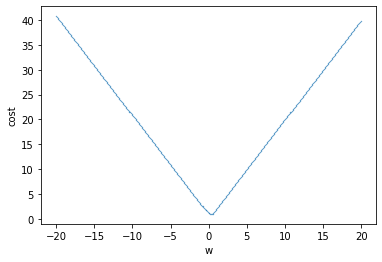

In [12]:
plt.xlabel("w")
plt.ylabel("cost")
plt.scatter(weight_abs,cost_num_abs, s=0.1)

In [13]:
weight_randB=[]
bais=[]
cost_num_randB=[]
for i in range(-20,20):
    w=i*0.1
    for j in range(-20,20):
        b=j*0.1
        h3=Hypo(w,b)
        c=cost(h3,X,Y)
        weight_randB.append(w)
        bais.append(b)
        cost_num_randB.append(c)

In [14]:
len(weight_randB),len(bais),len(cost_num_randB)

(1600, 1600, 1600)

Text(0.5, 0, 'cost')

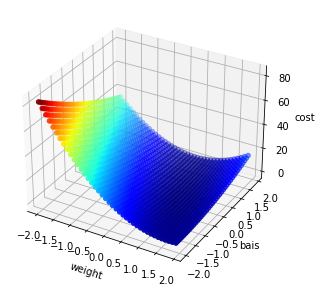

In [15]:
fig=plt.figure(figsize=(12,5))
ax = plt.subplot(1,1,1,projection='3d')
ax.scatter(weight_randB,bais,cost_num_randB,c=cost_num_randB,cmap='jet')
ax.set_xlabel('weight')
ax.set_ylabel('bais')
ax.set_zlabel('cost')
#ax.view_init(90, 0)

In [16]:
weight_b=[]
bais=[]
cost_num_b=[]
for i in range(-20,20):
    w=i*0.1
    for j in range(-20,20):
        b=j*0.1
        h3=Hypo(w,b)
        c=cost1(h3,X,Y)
        weight_b.append(w)
        bais.append(b)
        cost_num_b.append(c)

Text(0.5, 0, 'cost')

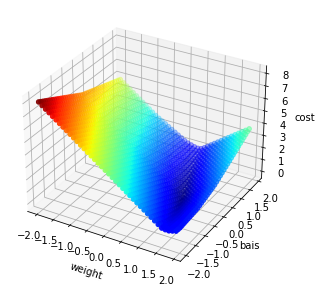

In [17]:
fig=plt.figure(figsize=(12,5))
ax = plt.subplot(1,1,1,projection='3d')
ax.scatter(weight_b,bais,cost_num_b,c=cost_num_b,cmap='jet')
ax.set_xlabel('weight')
ax.set_ylabel('bais')
ax.set_zlabel('cost')
#ax.view_init(90, 0)

# Gradient Descent Function



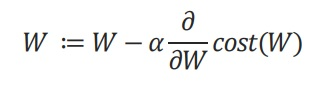

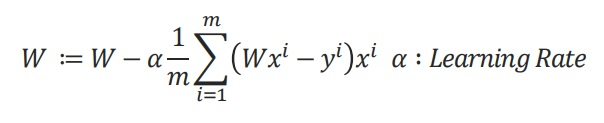

In [18]:
def Gradient_function(w, cost):
    b=False
    h= Hypo(w,b)
    cost_list=cost(h,X,Y)
    eps=0.00001
    h=Hypo(w+eps,b)
    cost_list2=cost(h,X,Y)
    dcost=cost_list2-cost_list
    dw=eps
    grad=dcost/dw
    return grad,((cost_list+cost_list2)*0.5)

In [19]:
def Gradient_function2(w, cost):
    b=False
    h=Hypo(w,b)
    grad = 0
    for i in range(len(X)):
        grad += 2*(h.hypothesis(X[i])- Y[i])*X[i] #앞에서 설명한 미분 X가 나와야함.
    grad = grad/ len(X)
    c = cost(h,X,Y)
    return grad, c

# Starting w=4

In [20]:
lr=0.01
w1 =4
w2 =4
list_w1=[]#weight
list_c1=[]#cost
list_w2=[]
list_c2=[]
ax=[]# function1 and function2의 차이

In [21]:
for i in range(100):
    grad, mean_cost = Gradient_function(w1,cost)
    grad2, mean_cost2 = Gradient_function2(w2,cost)
    w1 -= lr*grad
    w2 -= lr*grad2
    list_w1.append(w1)
    list_c1.append(mean_cost)
    list_w2.append(w2)
    list_c2.append(mean_cost2)
    ax.append(w1-w2)

In [27]:
w1,w2

(1.0000034214949687, 1.0000084214809337)

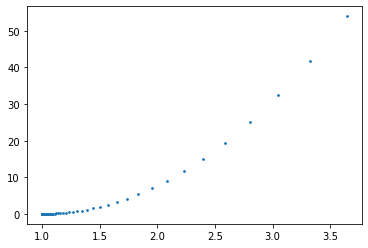

In [22]:
plt.scatter(list_w1,list_c1,s=3)

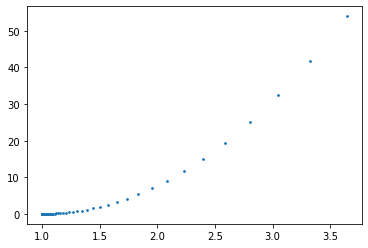

In [23]:
plt.scatter(list_w2,list_c2,s=3)

# Gradient_Function1, Gradient_Function2의 차이

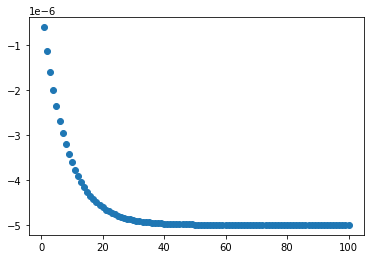

In [26]:
X=[i for i in range(1,101)]
plt.scatter(X,ax)